###### .<center> **Proyecto Primer Parcial-Análisis de Datos aplicados a la Ingeniería**


. <center> *Tema: **"Análisis espacio-temporal de la distribución de microfósiles presentes en  el Pozo Ricaurte -1 en la Cuenca Manabí, Ecuador"*** 
-
.<center>*Integrantes*: **Diana Mejía Cela //
             Daniella Mora Villón**

## **Introducción**

El petróleo, en un país como Ecuador, desempeña un papel fundamental en su estabilidad financiera, ya que es la principal fuente de energía y recurso de exportación por ende influye directamente en el crecimiento económico nacional (Soriano et al., 2019). 

EP PETROECUADOR es la empresa pública lider en la exploración, explotación, transporte, almacenamiento, industrialización y comercialización de hidrocarburos a escala nacional, por lo cual, tiene como objetivo incorporar nuevas reservas de gas y petróleo en niveles comerciales, mejorando su producción (Mora y Sánchez 2024).  Mantener la información actualizada les permite obtener mayor conocimiento geológico del área de estudio, optimizando la localización de yacimientos, reduciendo costos y riesgos en la exploración.

La micropaleontología es fundamental para caracterizar geológicamente un pozo petrolero, a través del estudio de microfósiles foraminíferos (planctónicos-bentónicos) y nanofósiles calcáreos, permitiendo comprender la evolución de paleoambientes de depósitos, definiendo el tiempo y espacio de las formaciones geológicas en el yacimiento (Bravo y Mejía, 2023).

La empresa pública de hidrocarburos ecuatoriana, actualmente posee bases de datos que contienen registros litoestratigráficos y micropaleontológicos de múltiples pozos perforados a lo largo de los bloques petroleros del país, sin embargo, durante la interpretación pueden ocurrir errores de correlación entre datos geofísicos y bioestatigráficos incurriendo en resultados inexactos, esto, probablemente debido a que al ser un conjunto de datos masivos no se realice un procesamiento exhaustivo de los mismos.

En relación con lo anterior, este proyecto busca uilizando Python procesar la base de datos del pozo Ricaurte -1 que incluye 48267 datos fosilíferos de tres disciplinas paleontológicas e identificar la abundacia específica de cada tipo fósil de acuerdo con su edad, frecuencia y porfundidad. Para posteriores trabajos esta base tratada será útil para realizar correlaciones confiables entre las unidades estratigráficas correspondientes.

## **Descipción del Proyecto** 

El pozo Ricaurte-1 localizado en La Cuenca de Manabí (Figura 1), considerada la más grande de las cuencas costeras del Terciario en Ecuador (Whittaker, 1988; Ordóñez et al., 2006), fue perforado en 1987 por TXC PECTEN a una profundidad de 14577 pies, en relación con la base de datos se tiene: registro de microfósiles, rangos bioestratigráficos, edades relativas, distribución de ocurrencias, frecuencias y zonas. 

Los datos se estructuran en un formato compatible con Python (archivo CSV) por lo cual se utilizaran scripts de Python,alojado en el ambiente virtual MoMe_P1 y librerías como Pandas para procesar los datos y Matplotlib para visualización de resultados. El proyecto busca lo siguiente: 
* Identificar el rango bioestatigráfico de los especies presentes en el pozo.
* Clasificar la tipología de fósil (calcáreo, palinomorfo, bentónicos) de todas las especies en la base de datos.
* Determinar la relación entre la profundidad inicial y final de aparición de cada especie según su frecuencia (raro, muy raro, comun,abundante,inundado,cuestionable). 
 


![Figura 1. Mapa de ubicación del pozo Ricaurte1](http://localhost:8888/files/OneDrive%20-%20Escuela%20Superior%20Polit%C3%A9cnica%20del%20Litoral/Documentos/MAESTRIA-ESPOL/ANALISIS%20DE%20DATOS/Proyecto%20P1/Figura1.png?_xsrf=2%7C370b5fb6%7C82c7d5de803e86c888c792acbedaff98%7C1718734915) **Figura 1**: Mapa de ubicación del pozo Ricaurte-1


## **Metodología**

La metodología del proyecto consiste en las siguientes tres fases descritas a continuación: 

### ***1.Carga y Pre-procesamiento de datos***

1.1  Importar con **pandas** el archivo **.xlsx**

In [1]:
import pandas as pd

In [2]:
                                                 dfP1=pd.read_excel("Microfosiles_2.xlsx")

1.2 Mediante el método **"info()"** se conocerá el resumen de los datos

In [3]:
                    dfP1.info() #Las columnas Edad f Cronos 2022 y Profundidad_final(ft) no tienen el tipo de dato correspondiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Número                                              3561 non-null   float64
 1   Especies                                            3973 non-null   object 
 2   Desde Rangos Bioestratigráficos (Bollie y Ordoñez)  3972 non-null   object 
 3   Hasta Rangos Bioestratigráficos (Bollie y Ordoñez)  3972 non-null   object 
 4   Piso i                                              3972 non-null   object 
 5   Piso f                                              3970 non-null   object 
 6   Edad i Cronos 2022                                  3973 non-null   float64
 7   Edad f Cronos 2022                                  3973 non-null   float64
 8   Profundidad_inicial_(ft)                            3973 non-null   int64  
 9

1.3 Convertir la columna Edad f Cronos 2022 a tipo de dato flotante y la Profundidad_final_(ft) a entero con el métodoo **"astype()"**

In [4]:
                         dfP1["Edad f Cronos 2022"]=dfP1["Edad f Cronos 2022"].astype(float) 

In [5]:
                     dfP1["Profundidad_final_(ft)"]=dfP1["Profundidad_final_(ft)"].astype(int)

In [6]:
                                                  dfP1.info() #Ahora los tipos de datos estan correctos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Número                                              3561 non-null   float64
 1   Especies                                            3973 non-null   object 
 2   Desde Rangos Bioestratigráficos (Bollie y Ordoñez)  3972 non-null   object 
 3   Hasta Rangos Bioestratigráficos (Bollie y Ordoñez)  3972 non-null   object 
 4   Piso i                                              3972 non-null   object 
 5   Piso f                                              3970 non-null   object 
 6   Edad i Cronos 2022                                  3973 non-null   float64
 7   Edad f Cronos 2022                                  3973 non-null   float64
 8   Profundidad_inicial_(ft)                            3973 non-null   int64  
 9

1.4 Eliminar las especies que finalicen con un "sp", "spp","spp.","sp.", en sus descripciones y eliminarlos mediante **filtros**

In [368]:
dfP1=dfP1[~dfP1["Especies"].str.endswith(("sp", "spp","spp.","sp."))]#Se utiliza el método str.endwith para asegurarnos de no eliminar especies que contienen las letras sp en medio de sus nombres

1.5 Identificar el método **"isna()"** datos nulos y reemplazar sus valores con "0" **"fillna()"**

In [369]:
                                                            dfP1.isna()

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3969,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3970,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3971,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [370]:
                                                        dfP1.fillna("1")

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
0,1,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5075,5125,raro,N5.5 - N4,planctónicos,31.83
1,1,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5475,5525,poco,N3 - P22,planctónicos,31.83
2,1,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5525,5625,raro,N3 - P22,planctónicos,31.83
3,1,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5875,5975,raro,N3 - P22,planctónicos,31.83
4,1,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5975,6025,muy raro,N3 - P22,planctónicos,31.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3670,3710,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3969,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3940,3980,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3970,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5000,5040,muy raro,VERRUTRICOLPORITES ROTUNDIPORIS/ECHIDIPORITES ...,palinomorfos,44.50
3971,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5710,5760,muy raro,CICATRICOSISPORITES DOROGENSIS/ MAGNASTRIATITE...,palinomorfos,44.50


1.6  Renombrar encabezados con identificadores más acordes al proyecto con el método **"rename()"**

In [375]:
dfP1.rename(columns={"Desde Rangos Bioestratigráficos (Bollie y Ordoñez)": "Desde R.B","Hasta Rangos Bioestratigráficos (Bollie y Ordoñez)":"Hasta R.B", "Edad i Cronos 2022":"Edadi","Edad f Cronos 2022":"Edadf", "Profundidad_inicial_(ft) ":"Prof i","Profundidad_final_(ft)":"Prof f"})

,Número,Especies,Desde R.B,Hasta R.B,Piso i,Piso f,Edadi,Edadf,Prof i,Prof f,Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
0,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5075,5125,raro,N5.5 - N4,planctónicos,31.83
1,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5475,5525,poco,N3 - P22,planctónicos,31.83
2,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5525,5625,raro,N3 - P22,planctónicos,31.83
3,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5875,5975,raro,N3 - P22,planctónicos,31.83
4,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5975,6025,muy raro,N3 - P22,planctónicos,31.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3670,3710,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3969,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3940,3980,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3970,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5000,5040,muy raro,VERRUTRICOLPORITES ROTUNDIPORIS/ECHIDIPORITES ...,palinomorfos,44.50
3971,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5710,5760,muy raro,CICATRICOSISPORITES DOROGENSIS/ MAGNASTRIATITE...,palinomorfos,44.50


1.7 Corregir las palabras de la columna frecuencia para que todas las filas aparezcan del mismo modo con ***replace()***

In [376]:
dfP1=dfP1.replace('común', 'comun')
dfP1=dfP1.replace('raro raro', 'raro')
dfP1=dfP1.replace('raro re', 'raro')
dfP1=dfP1.replace('RARO','raro')
dfP1

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
0,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5075,5125,raro,N5.5 - N4,planctónicos,31.83
1,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5475,5525,poco,N3 - P22,planctónicos,31.83
2,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5525,5625,raro,N3 - P22,planctónicos,31.83
3,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5875,5975,raro,N3 - P22,planctónicos,31.83
4,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5975,6025,muy raro,N3 - P22,planctónicos,31.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3670,3710,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3969,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3940,3980,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3970,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5000,5040,muy raro,VERRUTRICOLPORITES ROTUNDIPORIS/ECHIDIPORITES ...,palinomorfos,44.50
3971,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5710,5760,muy raro,CICATRICOSISPORITES DOROGENSIS/ MAGNASTRIATITE...,palinomorfos,44.50


## ***2. Análisis Exploratorio de Datos***

2.1. Agregar columna "Clasificación de microfósiles" para identificar fósiles calcáreos, benónicos y plantónicos; mediante el método **loc()**

In [430]:
planctónicos=dfP1.loc[:411, "Clasificación de microfósiles"] = 'planctónicos'
dfP1.head(412)

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
0,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.80,15.97,5075,5125,raro,N5.5 - N4,planctónicos,31.83
1,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.80,15.97,5475,5525,poco,N3 - P22,planctónicos,31.83
2,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.80,15.97,5525,5625,raro,N3 - P22,planctónicos,31.83
3,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.80,15.97,5875,5975,raro,N3 - P22,planctónicos,31.83
4,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.80,15.97,5975,6025,muy raro,N3 - P22,planctónicos,31.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,NaN,Globigerina corpulenta,Eoceno Medio temprano,Eoceno Tardío,Lutetiano,Priaboniano,47.80,33.90,8365,8415,raro,N1 - P20,planctónicos,13.90
408,NaN,Globigerina corpulenta,Eoceno Medio temprano,Eoceno Tardío,Lutetiano,Priaboniano,47.80,33.90,8865,8910,muy raro,N1 - P20,planctónicos,13.90
409,NaN,Praeorbulina glomerosa?,Mioceno Temprano tardío,Mioceno Medio temprano,Burdigaliano,Langhiano,20.44,15.97,4080,4130,raro,N8,planctónicos,4.47
410,NaN,Praeorbulina glomerosa?,Mioceno Temprano tardío,Mioceno Medio temprano,Burdigaliano,Langhiano,20.44,15.97,4780,4800,raro,N8,planctónicos,4.47


In [432]:
calcáreo=dfP1.loc[412:1308, "Clasificación de microfósiles"] = 'calcáreo'
dfP1[412:1308]

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
412,1.0,Braarudosphaera bigelowi?,Cretácico Superior temprano tardío,Cretácico Superior tardío tardío,Coniaciano,Maastrichtiano,89.80,66.0000,260,320,muy raro,NN15 - older,calcáreo,23.8000
471,3.0,Helicosphaera kamptneri,Mioceno Temprano temprano,Pleistoceno Tardío,Aquitaniano,Superior,23.03,0.0117,260,440,poco,NN15 - older,calcáreo,23.0183
472,3.0,Helicosphaera kamptneri,Mioceno Temprano temprano,Pleistoceno Tardío,Aquitaniano,Superior,23.03,0.0117,440,500,comun,NN15 - older,calcáreo,23.0183
473,3.0,Helicosphaera kamptneri,Mioceno Temprano temprano,Pleistoceno Tardío,Aquitaniano,Superior,23.03,0.0117,500,620,poco,NN15 - older,calcáreo,23.0183
474,3.0,Helicosphaera kamptneri,Mioceno Temprano temprano,Pleistoceno Tardío,Aquitaniano,Superior,23.03,0.0117,620,740,raro,NN15 - older,calcáreo,23.0183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.00,72.1000,3000,3350,poco,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9000
1512,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.00,72.1000,3400,3470,raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9000
1513,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.00,72.1000,3470,3530,poco,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9000
1514,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.00,72.1000,3580,3620,poco,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9000


In [427]:
palinomorfos=dfP1.loc[1308:3972, "Clasificación de microfósiles"] = 'palinomorfos'
dfP1[1308:]

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
1516,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.0,72.1,3760,3800,poco,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9
1517,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.0,72.1,3800,3890,raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9
1518,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.0,72.1,3940,4030,raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9
1519,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.0,72.1,4030,4070,poco,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9
1520,8.0,Laervigatosporites ovatus,Cretácico Inferior temprano temprano,Cretácico Superior tardío tardío,Berriasiano,Maastrichtiano,145.0,72.1,4070,4520,raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,72.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.5,3670,3710,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.5
3969,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.5,3940,3980,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.5
3970,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.5,5000,5040,muy raro,VERRUTRICOLPORITES ROTUNDIPORIS/ECHIDIPORITES ...,palinomorfos,44.5
3971,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.5,5710,5760,muy raro,CICATRICOSISPORITES DOROGENSIS/ MAGNASTRIATITE...,palinomorfos,44.5


2.2 Agregar columna "Def. Rangos Estatigráficos" con método ***loc()***

In [411]:
resta_rangos= dfP1["Edad i Cronos 2022"]-dfP1["Edad f Cronos 2022"]
dfP1.loc[:,"Def. Rangos Estatigráficos"] = resta_rangos
dfP1

,Número,Especies,Desde Rangos Bioestratigráficos (Bollie y Ordoñez),Hasta Rangos Bioestratigráficos (Bollie y Ordoñez),Piso i,Piso f,Edad i Cronos 2022,Edad f Cronos 2022,Profundidad_inicial_(ft),Profundidad_final_(ft),Frecuencia,Zonas,Clasificación de microfósiles,Def. Rangos Estatigráficos
0,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5075,5125,raro,N5.5 - N4,palinomorfos,31.83
1,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5475,5525,poco,N3 - P22,palinomorfos,31.83
2,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5525,5625,raro,N3 - P22,palinomorfos,31.83
3,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5875,5975,raro,N3 - P22,palinomorfos,31.83
4,NaN,Catapsydrax dissimilis*,Eoceno Medio temprano,Mioceno Temprano tardío,Lutetiano,Burdigaliano,47.8,15.97,5975,6025,muy raro,N3 - P22,palinomorfos,31.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3670,3710,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3969,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,3940,3980,muy raro,CRASSORETITRILETES VAHARAAOCHOOVENI ZONE,palinomorfos,44.50
3970,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5000,5040,muy raro,VERRUTRICOLPORITES ROTUNDIPORIS/ECHIDIPORITES ...,palinomorfos,44.50
3971,167.0,Ascodinium verrucosum,Cretácico Inferior temprano temprano,Cretácico Superior temprano temprano,Berriasiano,Cenomaniano,145.0,100.50,5710,5760,muy raro,CICATRICOSISPORITES DOROGENSIS/ MAGNASTRIATITE...,palinomorfos,44.50


2.3 Agrupar por Especies y la columna profundidad final e inicial para encontrar la máxima profundidad final y mínima profundidad inicial a la que apreció cada fósil, mediante ***groupby()*** y ***max()***

In [434]:
Prof_max=dfP1.groupby("Especies")["Profundidad_final_(ft)"].max().reset_index()
Prof_min=dfP1.groupby("Especies")["Profundidad_inicial_(ft) "].min().reset_index()
display(Prof_max)
display(Prof_min)

,Especies,Profundidad_final_(ft)
0,Ascodinium verrucosum,7900
1,Bisaccate pollen,5850
2,Bombacacidites baculatus,2200
3,Bombacacidites brevis,8950
4,Bombacacidites ciriloemsis,1550
...,...,...
205,Triquetrorhabdulus carinatus,6000
206,Undifferentiated dinocyste,9050
207,Verrucatosporites usmensis,9000
208,Verrutricolporites rotundiporus,8500


,Especies,Profundidad_inicial_(ft)
0,Ascodinium verrucosum,500
1,Bisaccate pollen,260
2,Bombacacidites baculatus,320
3,Bombacacidites brevis,960
4,Bombacacidites ciriloemsis,380
...,...,...
205,Triquetrorhabdulus carinatus,5250
206,Undifferentiated dinocyste,320
207,Verrucatosporites usmensis,260
208,Verrutricolporites rotundiporus,1900


2.4 Agrupar por Especies y la columna rango estatigráfico para identificar biocroma más corto, mediante ***min()***

In [435]:
biocroma=dfp1_histograma1.groupby("Especies")['Def. Rangos Estatigráficos'].min().reset_index()
biocroma_descendente = biocroma.sort_values(by='Def. Rangos Estatigráficos', ascending=True).reset_index(drop=True)
biocroma_descendente

,Especies,Def. Rangos Estatigráficos
0,Sphaeroidinellopsis multiloba,1.92
1,Clavatorella sturanii,2.15
2,Orbulina suturalis,2.15
3,Globorotalia fohsi peripheroacuta,2.15
4,Globigerinoita morugaensis?,2.19
...,...,...
117,Coccolithus pelagicus,63.42
118,Monoporites anmulatus,66.00
119,Proxapertites operculatus,71.97
120,Triporate pollen,107.67


2.5 Filtrar el data frame para conocer la frecuencia de cada especie

In [436]:
filtro_raro= dfP1.loc[dfP1["Frecuencia"] == "raro", ["Especies", "Frecuencia"]]
filtro_muyraro=dfP1.loc[dfP1["Frecuencia"] == "muy raro", ["Especies", "Frecuencia"]]
filtro_poco=dfP1.loc[dfP1["Frecuencia"] == "poco", ["Especies", "Frecuencia"]]
filtro_abundante=dfP1.loc[dfP1["Frecuencia"] == "abundante", ["Especies", "Frecuencia"]]
filtro_comun=dfP1.loc[dfP1["Frecuencia"] == "comun", ["Especies", "Frecuencia"]]
filtro_cuestionable=dfP1.loc[dfP1["Frecuencia"] == "cuestionable", ["Especies", "Frecuencia"]]
filtro_inundado=dfP1.loc[dfP1["Frecuencia"] == "inundado", ["Especies", "Frecuencia"]]
display(filtro_raro,filtro_muyraro,filtro_poco,filtro_abundante,filtro_comun,filtro_cuestionable,filtro_inundado)

,Especies,Frecuencia
0,Catapsydrax dissimilis*,raro
2,Catapsydrax dissimilis*,raro
3,Catapsydrax dissimilis*,raro
5,Globigerinoides bulloideus,raro
7,Globigerinoides bulloideus,raro
...,...,...
3876,Spiniferites pseudofurcatus,raro
3878,Spiniferites pseudofurcatus,raro
3961,Ascodinium verrucosum,raro
3962,Ascodinium verrucosum,raro


,Especies,Frecuencia
4,Catapsydrax dissimilis*,muy raro
12,Globorotalia scitula,muy raro
13,Globorotalia scitula,muy raro
14,Globorotalia scitula,muy raro
21,Catapsydrax dissimilis*,muy raro
...,...,...
3968,Ascodinium verrucosum,muy raro
3969,Ascodinium verrucosum,muy raro
3970,Ascodinium verrucosum,muy raro
3971,Ascodinium verrucosum,muy raro


,Especies,Frecuencia
1,Catapsydrax dissimilis*,poco
16,Catapsydrax dissimilis*,poco
19,Catapsydrax dissimilis*,poco
109,Globigerina venezuelana*,poco
111,Globigerina venezuelana*,poco
...,...,...
2763,Psilatricolporites operculatus,poco
2801,Psilatricolporites operculatus,poco
2912,Perisyncecolporites pokornyi,poco
2986,Perisyncecolporites pokornyi,poco


,Especies,Frecuencia
89,Globigerina venezuelana*,abundante
112,Globigerina venezuelana*,abundante
142,Globigerinoides sacculifer,abundante
183,Globigerinoides quadrilobatus,abundante
242,Globigerinoides immaturus-trilobus,abundante
311,Globorotalia fohsi peripheroronda*,abundante
481,Helicosphaera kamptneri,abundante
486,Helicosphaera kamptneri,abundante
506,Helicosphaera kamptneri,abundante
510,Helicosphaera kamptneri,abundante


,Especies,Frecuencia
6,Globigerinoides bulloideus,comun
53,Globigerinoides immaturus,comun
61,Globigerinoides immaturus,comun
68,Globigerina ampliapertura,comun
85,Globigerina venezuelana*,comun
...,...,...
3831,Operculodinium centrocarpum,comun
3832,Operculodinium centrocarpum,comun
3834,Operculodinium centrocarpum,comun
3850,Lingulodinium machaerophorum,comun


,Especies,Frecuencia
3130,Cicatricosisporites dorogensis*,cuestionable
3131,Cicatricosisporites dorogensis*,cuestionable
3132,Cicatricosisporites dorogensis*,cuestionable
3134,Cicatricosisporites dorogensis*,cuestionable
3139,Cicatricosisporites dorogensis*,cuestionable


,Especies,Frecuencia
106,Globigerina venezuelana*,inundado
310,Globorotalia fohsi peripheroronda*,inundado
513,Helicosphaera kamptneri,inundado
515,Helicosphaera kamptneri,inundado
516,Helicosphaera kamptneri,inundado
...,...,...
3827,Operculodinium centrocarpum,inundado
3830,Operculodinium centrocarpum,inundado
3833,Operculodinium centrocarpum,inundado
3837,Operculodinium centrocarpum,inundado


## ***3.Visualización de Datos***

### **Resultados y visualizaciones**

3.1 Importar las librerías correspondientes para desarrollar gráficos

In [140]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

3.2 Gráfico para identificar el rango cornoestatigrafico por cada microfósil

In [161]:
dfp1_histograma1=dfP1[~dfP1["Especies"].str.endswith("*","?")] #Se realiza modificaciones al data frame original, para tener una repetición por especie
dfp1_histograma1=dfp1_histograma1[~dfp1_histograma1["Especies"].str.endswith("*?","sp")]
dfp1_histograma1=dfp1_histograma1[~dfp1_histograma1["Especies"].str.endswith("spp","sp.")]
dfp1_histograma1=dfp1_histograma1[~dfp1_histograma1["Especies"].str.endswith("spp.")]
dfp1_histograma1=dfp1_histograma1[~dfp1_histograma1["Especies"].str.contains("spp","sp.")]
dfp1_histograma1=dfp1_histograma1[~dfp1_histograma1["Especies"].str.contains("sp","spp.")]

In [162]:
dfp1_histograma1=dfp1_histograma1.drop_duplicates(subset=['Especies'], keep='first').reset_index().round(2)

In [445]:
dfp1_histograma1.loc[0, 'Edad f Cronos 2022'] = 7.246 #se corrige rango bioestatigráfico de acuerdo a los decimales en relación a los índices necesarios
dfp1_histograma1.loc[21, 'Edad f Cronos 2022'] = 7.246
dfp1_histograma1.loc[22, 'Edad i Cronos 2022'] = 7.246
dfp1_histograma1.loc[49, 'Edad f Cronos 2022'] = 7.246
dfp1_histograma1.loc[53, 'Edad i Cronos 2022'] = 5.33
dfp1_histograma1.loc[92, 'Edad f Cronos 2022'] = 5.33
dfp1_histograma1.loc[117, 'Edad f Cronos 2022'] = 5.33
dfp1_histograma1.loc[26, 'Edad f Cronos 2022'] = 7.246
dfp1_histograma1.loc[27, 'Edad i Cronos 2022'] = 7.246
dfp1_histograma1.loc[58, 'Edad f Cronos 2022'] = 7.246
dfp1_histograma1.loc[62, 'Edad i Cronos 2022'] = 5.33
dfp1_histograma1.loc[88, 'Edad f Cronos 2022'] = 5.33
resta_rangos1=(dfp1_histograma1["Edad i Cronos 2022"]-dfp1_histograma1["Edad f Cronos 2022"]).abs()
dfp1_histograma1.loc[:,"Def. Rangos Estatigráficos"] = resta_rangos1
dfp1_histograma1= dfp1_histograma1[dfp1_histograma1["Especies"] != 'Orbulina bilobata']
dfp1_histograma1= dfp1_histograma1[dfp1_histograma1["Especies"] != 'Undifferentiated dinocyste']
dfp1_histograma1= dfp1_histograma1[dfp1_histograma1["Especies"] != 'Globigerina riveroae']
dfp1_histograma1=dfp1_histograma1.round(2)

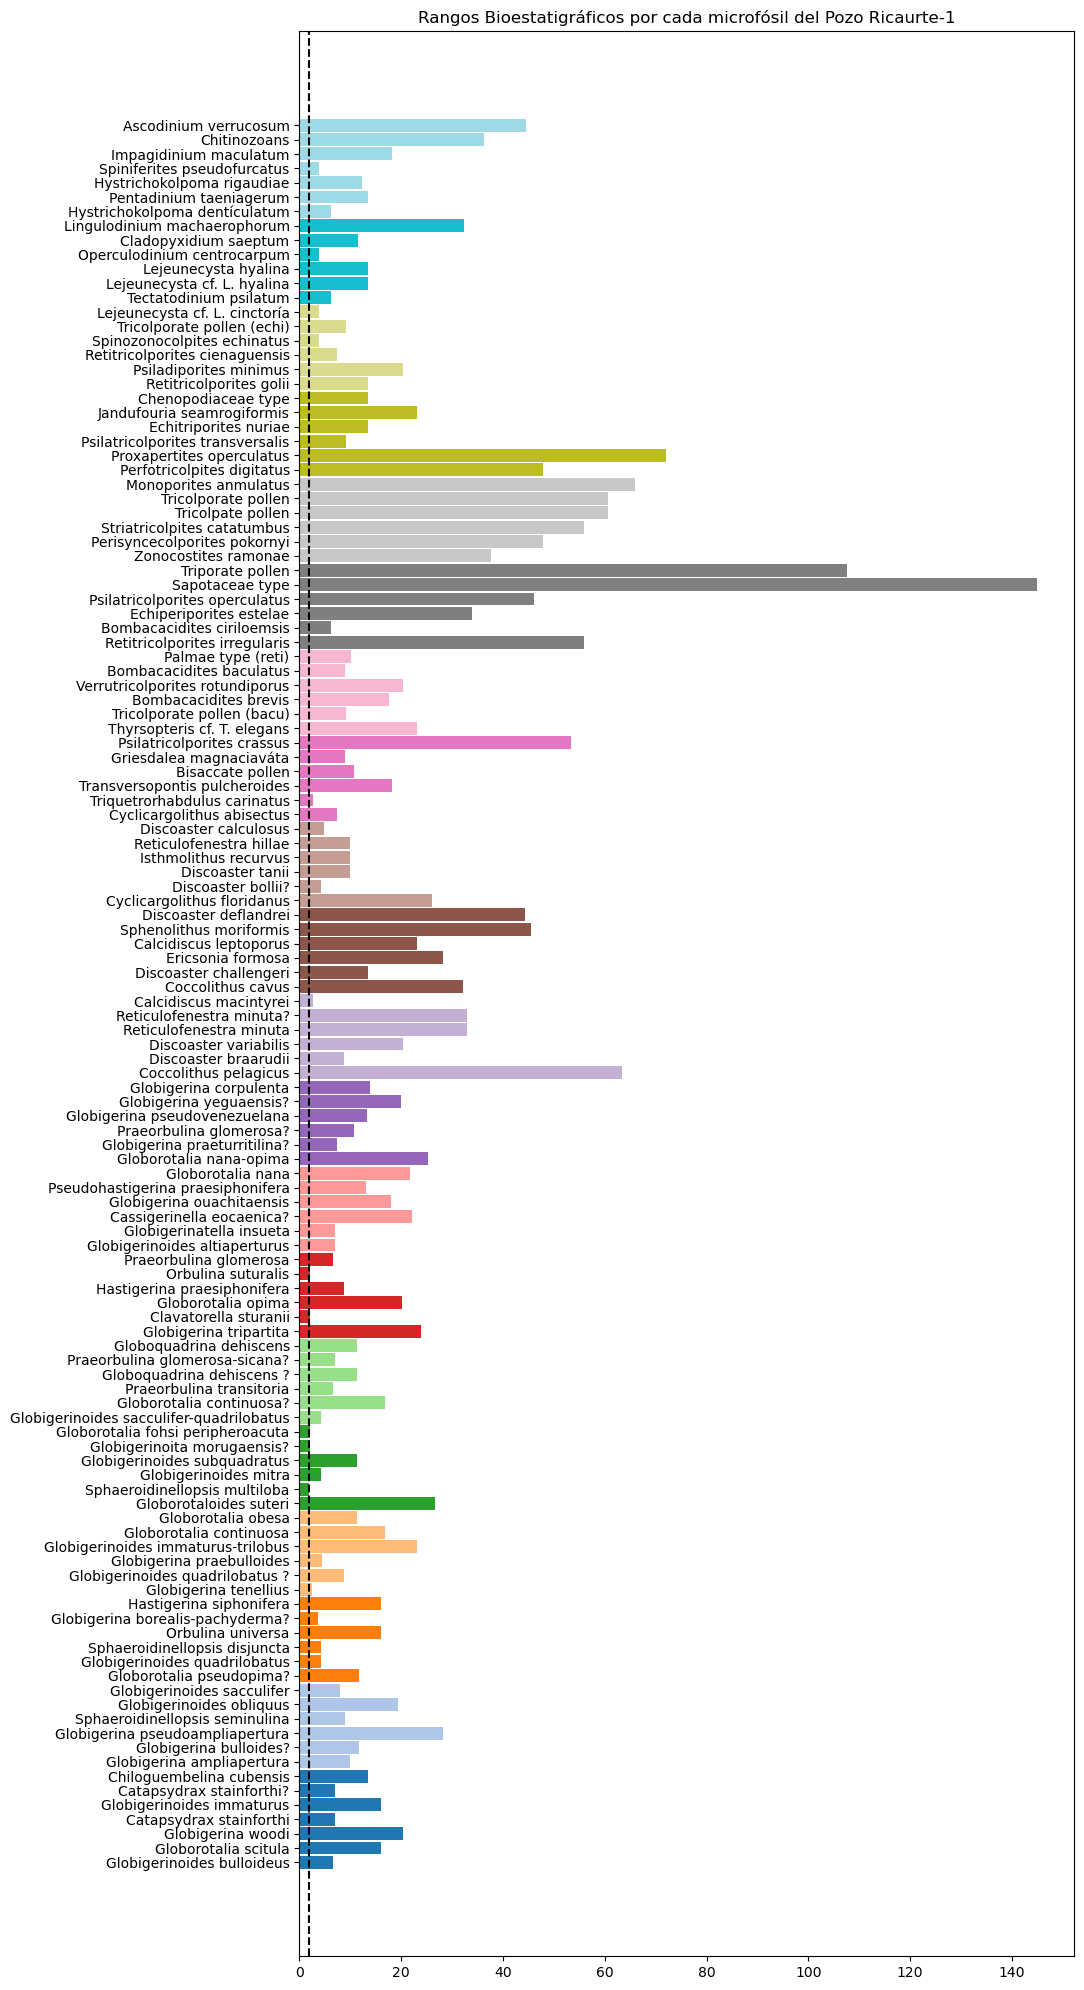

In [449]:
fig,axs=plt.subplots(1,1,figsize=(10,25))
cmap = plt.cm.get_cmap('tab20', len(dfp1_histograma1['Especies']))
colores = [cmap(i) for i in range(len(dfp1_histograma1['Especies']))] #Se utiliza un for para asignar un color a las 122 especies
axs.barh(dfp1_histograma1['Especies'], dfp1_histograma1['Def. Rangos Estatigráficos'],height=0.90, color=colores)

axs.tick_params(axis='y', labelsize=10)
axs.axvline(x=1.92, c="k", ls="--")
axs.set_title("Rangos Bioestatigráficos por cada microfósil del Pozo Ricaurte-1")

plt.show()

3.2 Gráfico de barras en donde se totaliza la clasificación por tipo de fósil.

In [456]:
tipos =dfP1["Clasificación de microfósiles"].value_counts()
tipos

Clasificación de microfósiles
palinomorfos    1238
calcáreo         815
planctónicos     412
Name: count, dtype: int64

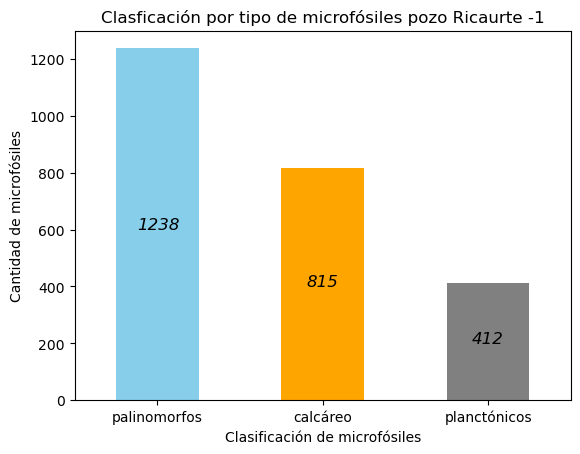

In [450]:
fig, ax = plt.subplots()
tipos.plot(kind='bar', ax=ax, color=['skyblue', 'orange', 'gray'])
ax.set_ylabel("Cantidad de microfósiles")
ax.set_title("Clasficación por tipo de microfósiles pozo Ricaurte -1")
#ax.text(0,10, "1238", style="italic", fontsize=12)
ax.text(-0.12,600, "1238", style="italic", fontsize=12)
ax.text(0.90,400, "815", style="italic", fontsize=12)
ax.text(1.90,200, "412", style="italic", fontsize=12)
plt.xticks(rotation=360)
plt.show()

3.3 Gráficos de dispersión para la relación entre la profundidad inicial y final de aparición de cada especie según su frecuencia 

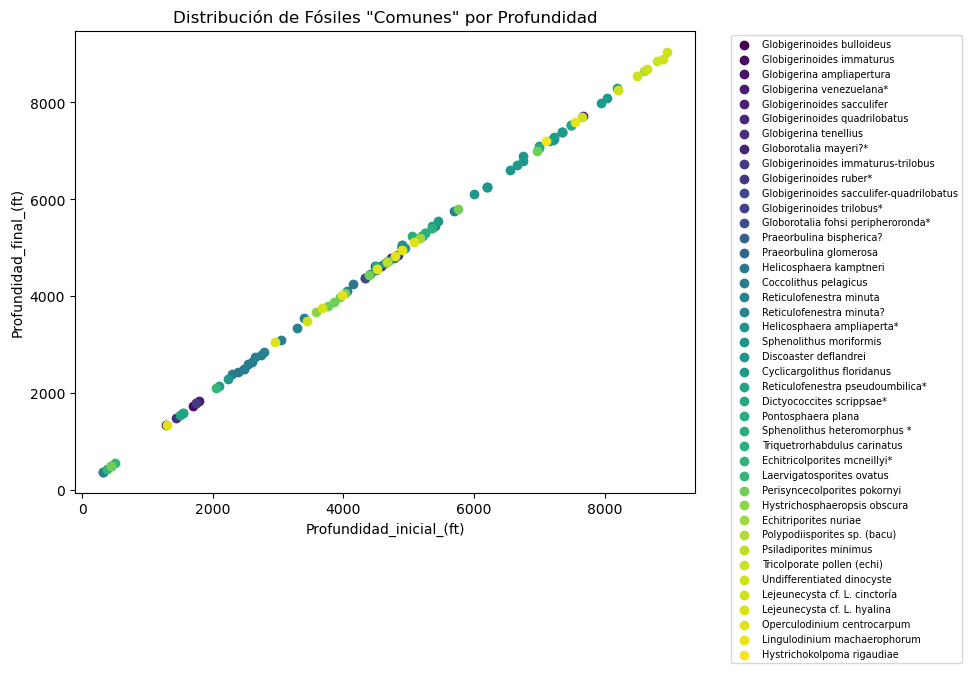

In [441]:
raros = dfP1[dfP1['Frecuencia'] == 'raro']
muy_raros = dfP1[dfP1['Frecuencia'] == 'muy raro']
comunes = dfP1[dfP1['Frecuencia'] == 'comun']
abundantes = dfP1[dfP1['Frecuencia'] == 'abundante']
cuestionables = dfP1[dfP1['Frecuencia'] == 'cuestionable']
inundados = dfP1[dfP1['Frecuencia'] == 'inundado']

# Graficar
plt.figure(figsize=(8, 6))
species_unique = dfP1['Especies'].unique()
color_map = plt.cm.get_cmap('viridis', len(species_unique))
species_colors = {species: color_map(i) for i, species in enumerate(species_unique)}
for species in comunes['Especies'].unique():
    subset = comunes[comunes['Especies'] == species]
    plt.scatter(subset['Profundidad_inicial_(ft) '], subset['Profundidad_final_(ft)'],
                color=species_colors[species],label=f'{species}')

plt.xlabel('Profundidad_inicial_(ft)')
plt.ylabel("Profundidad_final_(ft)")
plt.title('Distribución de Fósiles "Comunes" por Profundidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 7})

plt.show()

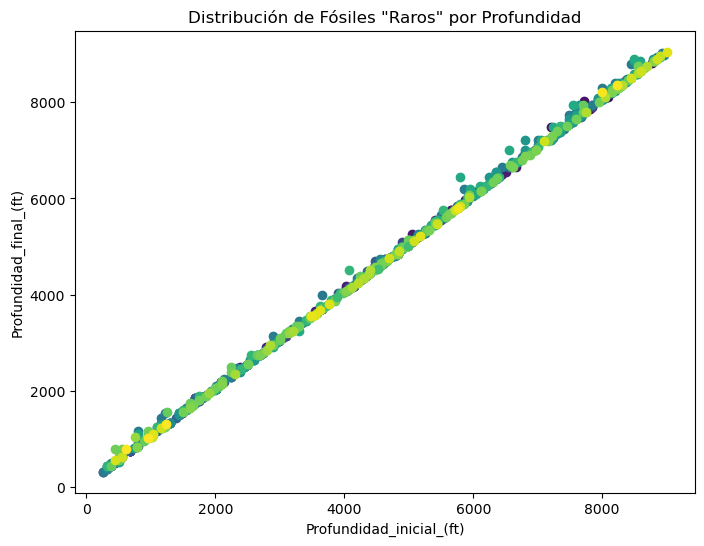

In [442]:
plt.figure(figsize=(8, 6))
species_unique = dfP1['Especies'].unique()
color_map = plt.cm.get_cmap('plasma', len(species_unique))
for species in raros['Especies'].unique():
   subset = raros[raros['Especies'] == species]
   plt.scatter(subset['Profundidad_inicial_(ft) '], subset['Profundidad_final_(ft)'],
                color=species_colors[species], label=f'{species}')

plt.xlabel('Profundidad_inicial_(ft)')
plt.ylabel("Profundidad_final_(ft)")
plt.title('Distribución de Fósiles "Raros" por Profundidad')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 3})

plt.show()

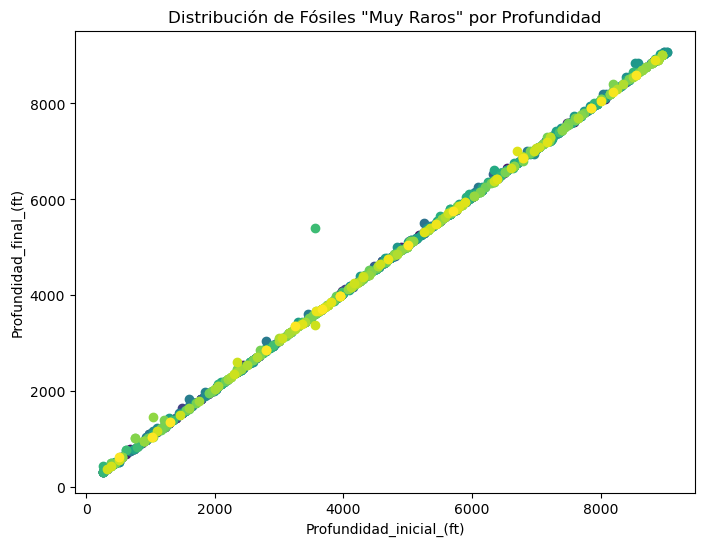

In [358]:
plt.figure(figsize=(8, 6))
species_unique = dfP1['Especies'].unique()
color_map = plt.cm.get_cmap('plasma', len(species_unique))
for species in muy_raros['Especies'].unique():
   subset = muy_raros[muy_raros['Especies'] == species]
   plt.scatter(subset['Profundidad_inicial_(ft) '], subset['Profundidad_final_(ft)'],
                color=species_colors[species], label=f'{species}')

plt.xlabel('Profundidad_inicial_(ft)')
plt.ylabel("Profundidad_final_(ft)")
plt.title('Distribución de Fósiles "Muy Raros" por Profundidad')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 3})

plt.show()

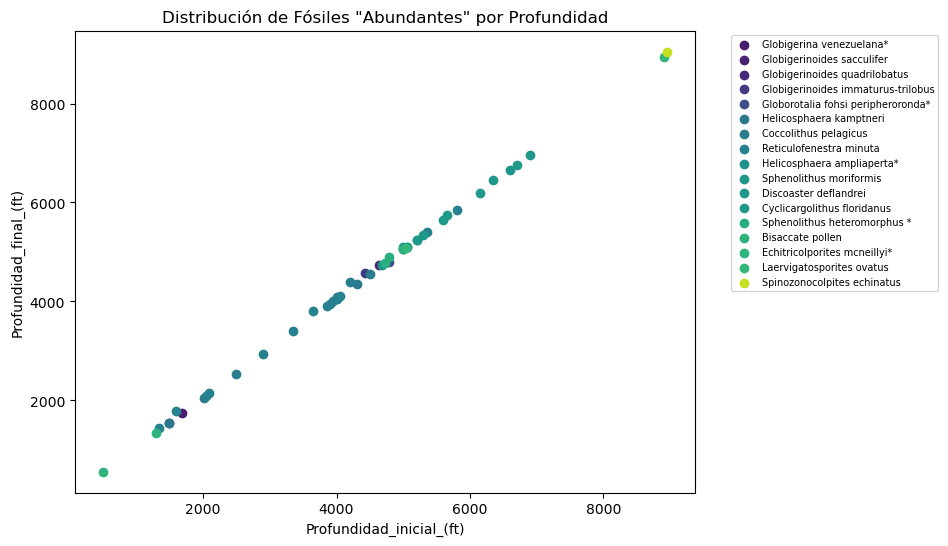

In [443]:
plt.figure(figsize=(8, 6))
species_unique = dfP1['Especies'].unique()
color_map = plt.cm.get_cmap('plasma', len(species_unique))
for species in abundantes['Especies'].unique():
   subset = abundantes[abundantes['Especies'] == species]
   plt.scatter(subset['Profundidad_inicial_(ft) '], subset['Profundidad_final_(ft)'],
                color=species_colors[species], label=f'{species}')

plt.xlabel('Profundidad_inicial_(ft)')
plt.ylabel("Profundidad_final_(ft)")
plt.title('Distribución de Fósiles "Abundantes" por Profundidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 7})

plt.show()

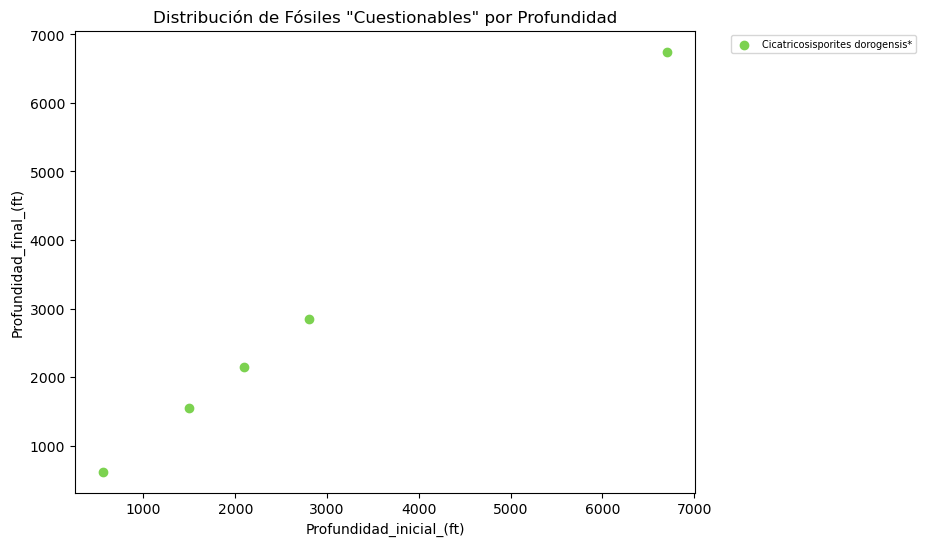

In [367]:
plt.figure(figsize=(8, 6))
species_unique = dfP1['Especies'].unique()
color_map = plt.cm.get_cmap('plasma', len(species_unique))
for species in cuestionables['Especies'].unique():
   subset = cuestionables[cuestionables['Especies'] == species]
   plt.scatter(subset['Profundidad_inicial_(ft) '], subset['Profundidad_final_(ft)'],
                color=species_colors[species], label=f'{species}')

plt.xlabel('Profundidad_inicial_(ft)')
plt.ylabel("Profundidad_final_(ft)")
plt.title('Distribución de Fósiles "Cuestionables" por Profundidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 7})

plt.show()

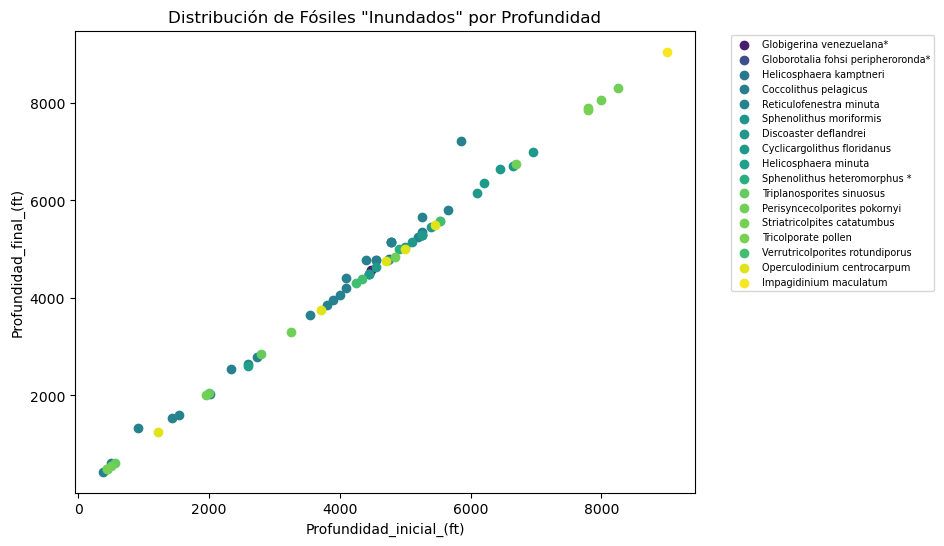

In [366]:
plt.figure(figsize=(8, 6))
species_unique = dfP1['Especies'].unique()
color_map = plt.cm.get_cmap('plasma', len(species_unique))
for species in inundados['Especies'].unique():
   subset = inundados[inundados['Especies'] == species]
   plt.scatter(subset['Profundidad_inicial_(ft) '], subset['Profundidad_final_(ft)'],
                color=species_colors[species], label=f'{species}')

plt.xlabel('Profundidad_inicial_(ft)')
plt.ylabel("Profundidad_final_(ft)")
plt.title('Distribución de Fósiles "Inundados" por Profundidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 7})

plt.show()

## **Conclusiones**
* La especie con el menor biocroma es el Sphaeroidinellopsis multiloba con 1.92.
* Existen en total 1238 fósiles palinomorfos, 815 fósiles calcáreoa y 412 fósiles planctónicos en el pozo Ricaurte -P1.
* La correlación de profundidad inicial y final según su especie y frecuencia es positiva para todoos los casos, con esto se demuestra que la especie aparece de forma ascendente a lo largo del pozo Ricaurte -P1.

## **Recomendaciones**

* Aplicar este código a todos los pozos concesionados por EP PETROECUADOR para que disminuyan errores durante la etapa de correlación estatigráfica.
* Utilizar estos resultados como elemento complementario a registros eleéctricos para caracteriza geológicamente al pozo Ricaurte -R1.

## **Referencias**
- Bravo Murillo, G. M., & Mejía Cela, D. A. (2023). Actualización de la información estratigráfica y bioestratigráfica del Pozo Ricaurte 1 en la Cuenca de Manabí desde el Eoceno hasta el Plioceno.
- Mora Estrada, G. M., & Sánchez Paladines, D. (2024). Proyecto de automatización e integración de sistemas de recepción y despacho del terminal de productos limpios Barbasquillo (Doctoral dissertation, ESPAE-ESPOL).
- Ordóñez, M., Jiménez, N., & Suárez, J. (2006). MICROPALEONTOLOGÍA
ECUATORIANA.
- Soriano, F. J. G., Jiménez, D. D., & García, M. E. G. (2019). La inversión extranjera directa en el Ecuador 2018. RECIMUNDO: Revista Científica de la Investigación y el Conocimiento, 3(1), 446-471.
- Whittaker, J. E. (1988). Benthic Cenozoic Foraminifera from Ecuador: Taxonomy and Distribution of Smaller Benthic Foraminifera from Ecuador: Taxonomy and Distribution of Smaller Benthic Foraminifera from Coastal Ecuador (Late Oligocene Late Plio). British Museum (Natural History).